In [76]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
re_data = pd.read_csv('data/Ames_Real_Estate_Data.csv')
housing = pd.read_csv('data/Ames_Housing_Price_Data.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [77]:
re_data

,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
0,520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4599,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
1,520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4507,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
2,520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4513,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
3,520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,3449,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
4,520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4506,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22208,1018100010,1018100010,0,0,2400 SE 16TH ST,HOC,NaN,O-GSE,NaN,COMMERCIAL,...,2400,SE,16TH,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
22209,1018100025,1018100025,0,0,2500 SE 16TH ST,HOC,NaN,NaN,NaN,COMMERCIAL,...,2500,SE,16TH,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
22210,1018100035,1018100035,0,0,2600 SE 16TH ST,HOC,NaN,NaN,NaN,COMMERCIAL,...,2600,SE,16TH,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
22211,1018100040,1018100040,0,0,2423 US HIGHWAY 30,HOC,NaN,NaN,NaN,COMMERCIAL,...,2423,NaN,US HIGHWAY 30,NaN,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [78]:
housing

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42.0,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60.0,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80.0,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70.0,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,759,903205040,952,121000,30,RL,NaN,8854,Pave,NaN,...,40,0,NaN,NaN,NaN,0,5,2009,WD,Normal
2576,760,905402060,1733,139600,20,RL,NaN,13680,Pave,NaN,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal
2577,761,909275030,2002,145000,90,RH,82.0,6270,Pave,NaN,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
2578,762,907192040,1842,217500,60,RL,NaN,8826,Pave,NaN,...,0,0,NaN,NaN,NaN,0,7,2007,WD,Normal


In [79]:
both = pd.merge(housing,re_data,left_on='PID',right_on='MapRefNo')

In [80]:
pd.DataFrame(both.isnull().sum() / len(both)).sort_values(by=0,ascending=False).head(18)

,0
X2TPr_S,1.000000
PA-PostD,1.000000
X2TPr_D,1.000000
MA_Line2,1.000000
X2TSc_D,1.000000
X2TSc_S,1.000000
ZngCdSc,0.999616
PA-UnTyp,0.997311
X1TSc_S,0.997311
X1TPr_S,0.997311


In [97]:
remove = ['Unnamed: 0','PID','MapRefNo','GeoRefNo','Prop_Addr','Tier','Range','Legal_Pr','MA_Ownr1','MA_Ownr2','MA_Line1','MA_Line2',\
          'LndAc_S','ImpAc_S','OthAc_S','TtlVal_AsrYr','X1TPr_D','X1TSc_D','X2TPr_D','X2TSc_D','X1TPr_S','X1TSc_S','X2TPr_S','X2TSc_S',\
          'LndAcX1S','ImpAcX1S','ImpAcX2S','HSTtl_D','MilVal_D','HSTtl_S','MilVal_S','AcreX_S1','AcreGr','AcreNt_S','Neighborhood_y','LotArea_y','TtlBsmtSF','PA-Nmbr','PA-PreD','PA-Strt','PA-StSfx','PA-PostD','PA-UnTyp','PA-UntNo','SalePrice_y','ZngCdSc','ZngOLSc','ParType','BldgNo_S','Source','Utilities']
numers = ['GrLivArea', 'LotFrontage','LotArea_x', 'MasVnrArea', 'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF',\
          '1stFlrSF','2ndFlrSF','LowQualFinSF','BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr',\
          'TotRmsAbvGrd_x','Fireplaces_x','GLA','TotRmsAbvGrd_y','Fireplaces_y','PoolArea_y','NmbrBRs']

### Use these ### 
categ = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood_x',\
         'Condition1','Condition2','BldgType_x', 'HouseStyle_x','RoofStyle','RoofMatl_x','Exterior1st','Exterior2nd','MasVnrType_x','ExterQual',\
         'ExterCond','Foundation_x','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating_x','HeatingQC','CentralAir','GarageType_x','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC',\
         'Electrical','KitchenQual','Functional','FireplaceQu','ZngCdPr','ZngOLPr','Fence','ClassPr_S','ClassSc_S','SchD_S','TxD_S',\
         'MA_City','MA_State','MA_Zip1','MA_Zip2','Inst1TPr','ValType','DwlgNo_S','BldgType_y','HouseStyle_y','Foundation_y','RoofMatl_y','Ext1','Ext2','MasVnrType_y','Heating_y','Central Air',\
        'GarageType_y','SaleType_y','SaleCond','ParclRel','MiscFeature']
ordinal = ['OverallQual' ,'OverallCond','YearBuilt','YearRemodAdd','GarageYrBlt','GarageCars','GarageArea_x',\
           'WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea_x','MiscVal','SaleType_x','SaleCondition']
nonlin = ['BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd_x','Fireplaces_x','Fireplaces_y','PoolArea_y','NmbrBRs']
lin =['LotArea_x','BsmtFinSF1','TotRmsAbvGrd_y','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','BsmtFinSF2','GLA','2ndFlrSF','BsmtUnfSF','LowQualFinSF','LotFrontage']

y = both['SalePrice_x']
X = both[categ + ordinal + lin + nonlin]

pandas.core.frame.DataFrame

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


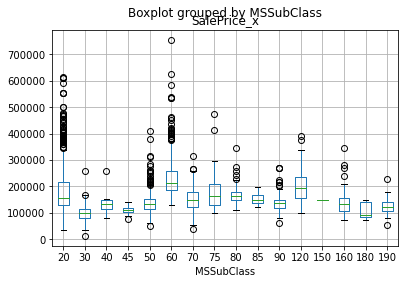

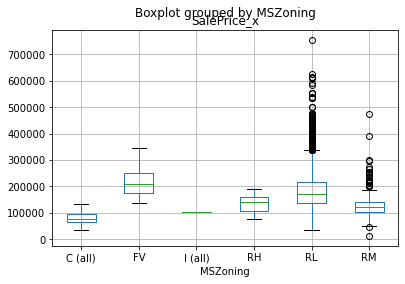

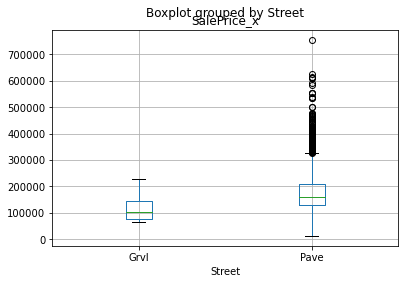

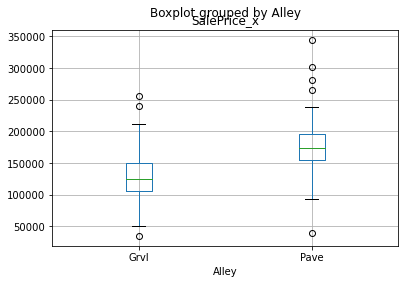

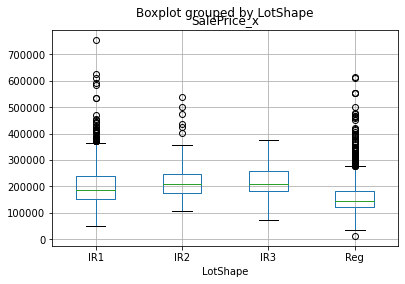

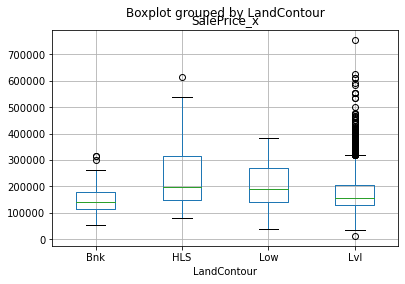

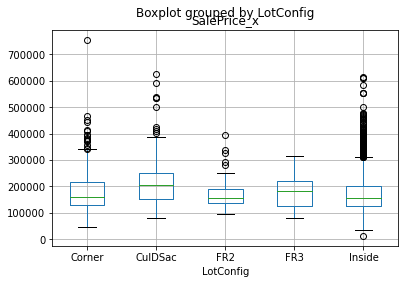

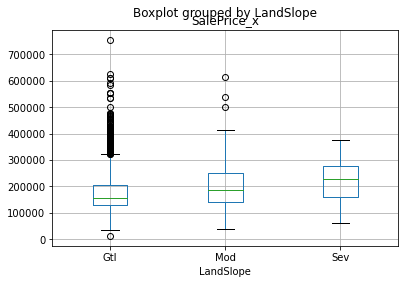

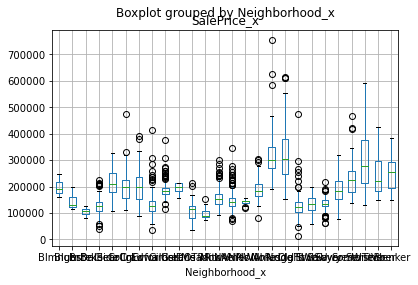

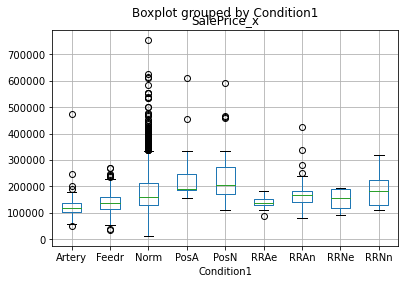

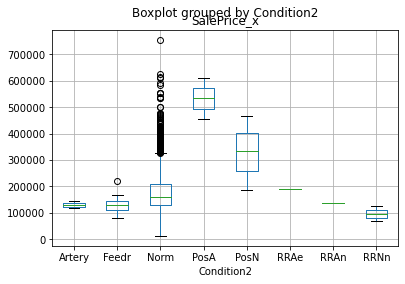

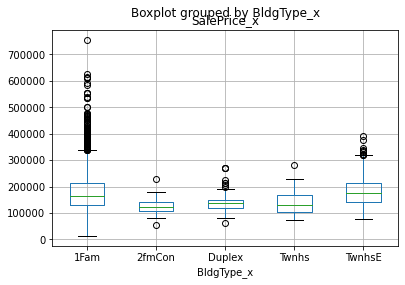

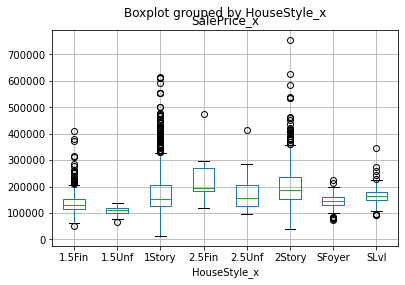

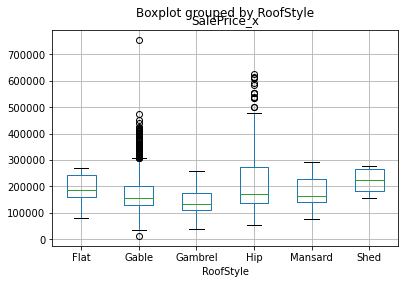

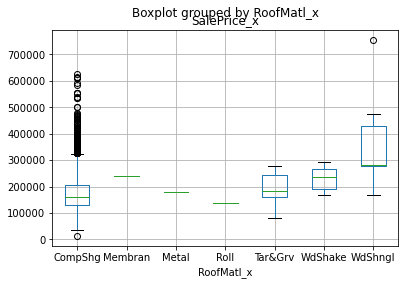

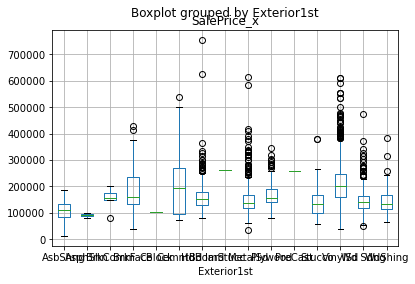

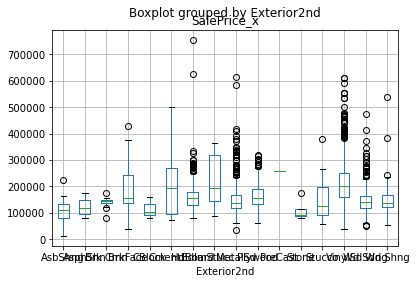

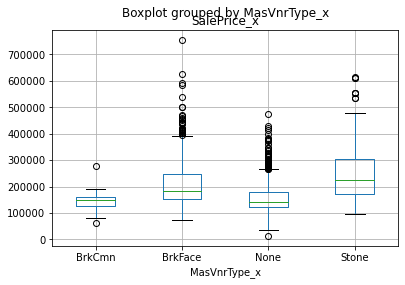

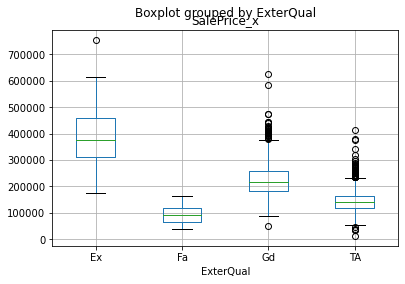

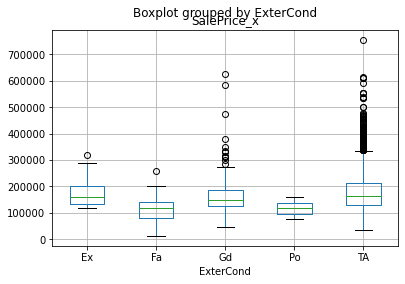

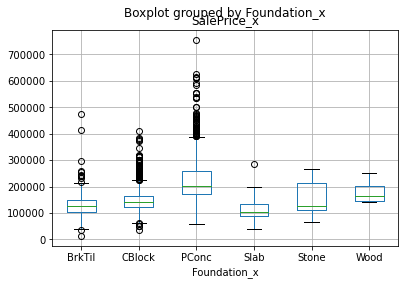

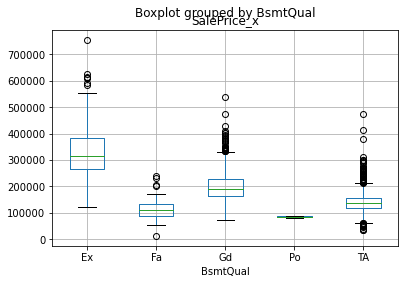

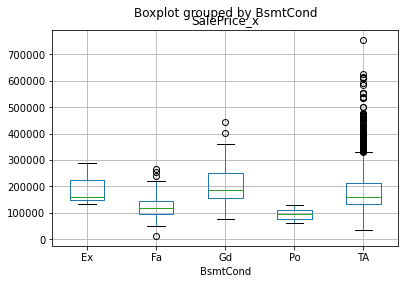

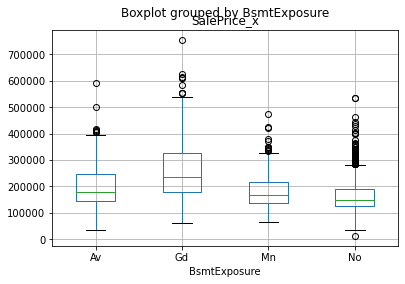

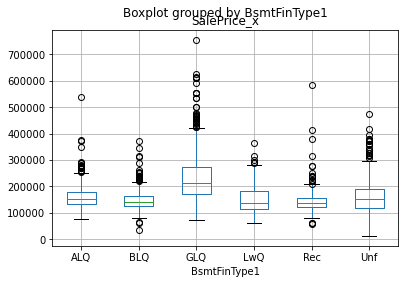

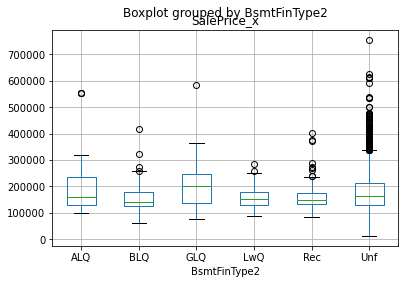

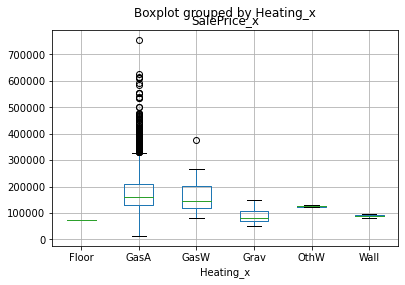

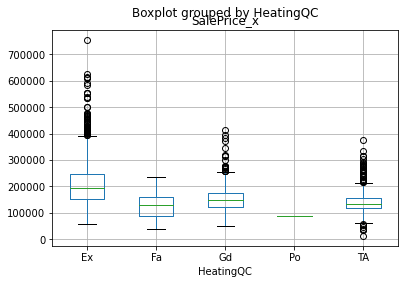

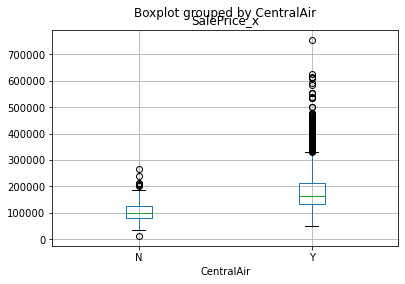

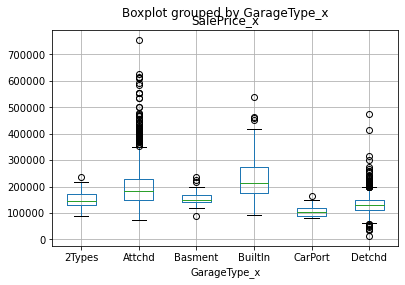

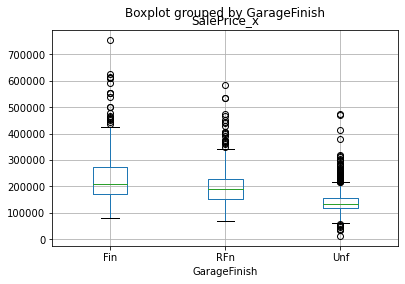

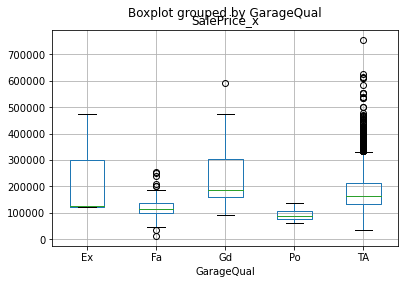

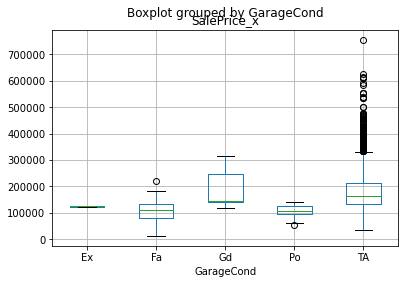

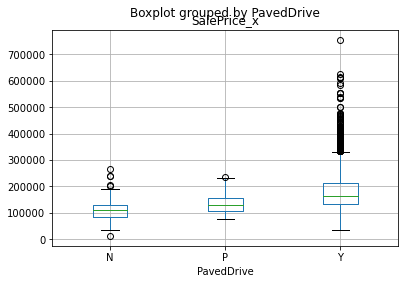

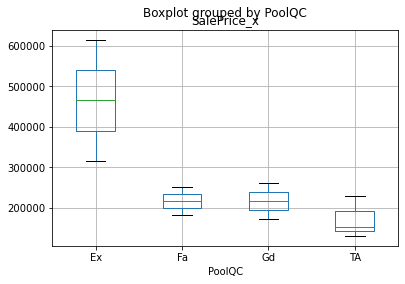

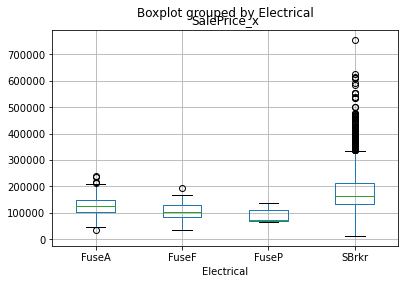

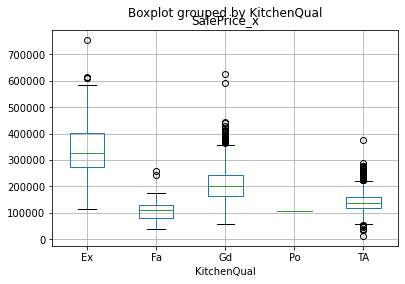

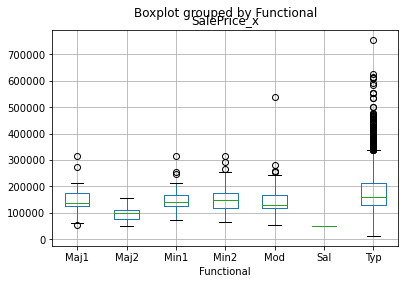

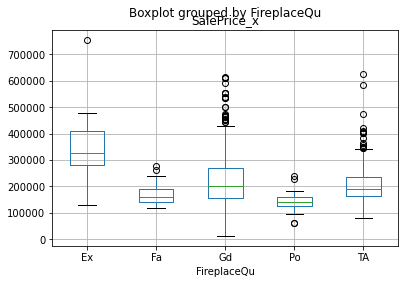

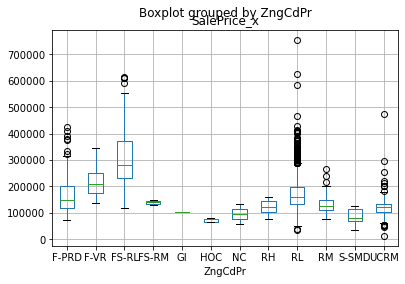

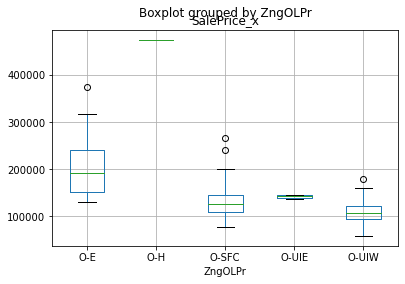

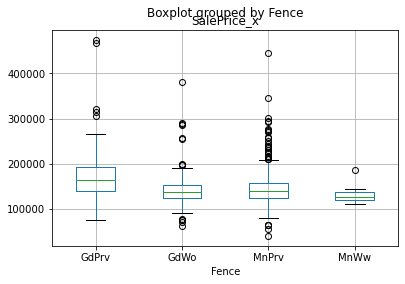

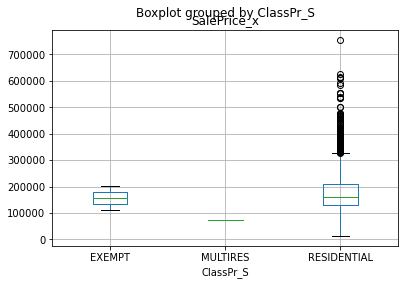

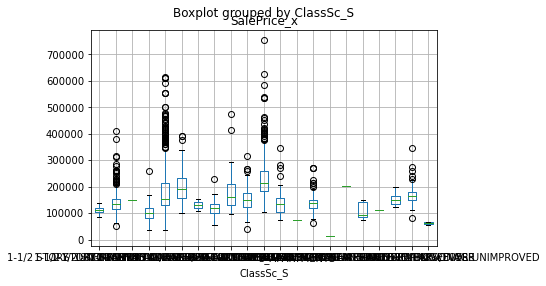

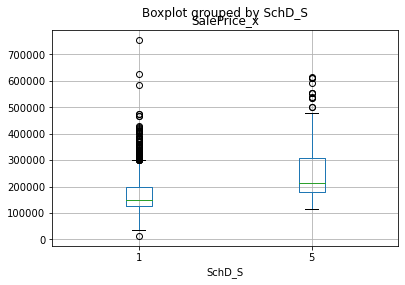

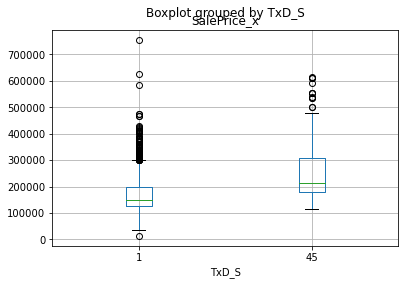

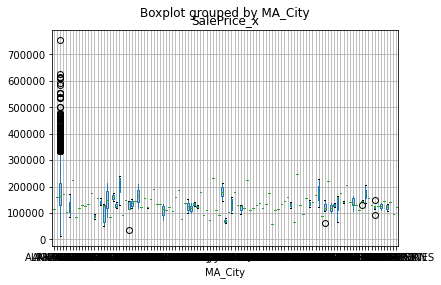

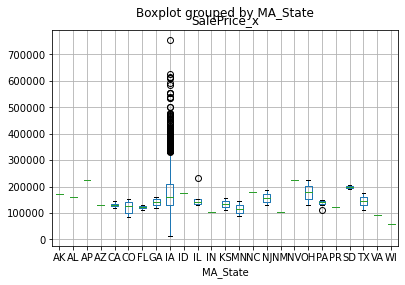

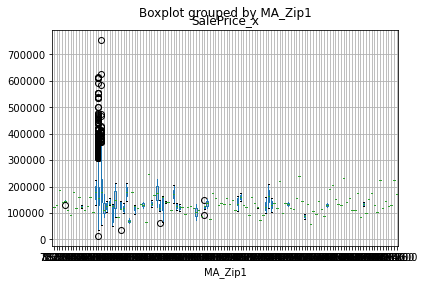

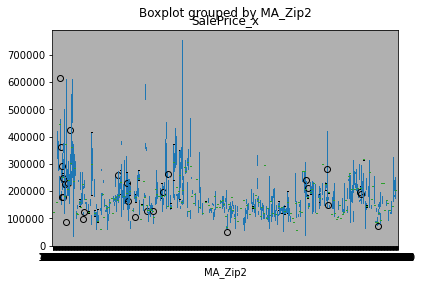

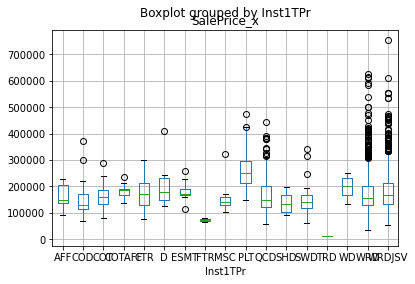

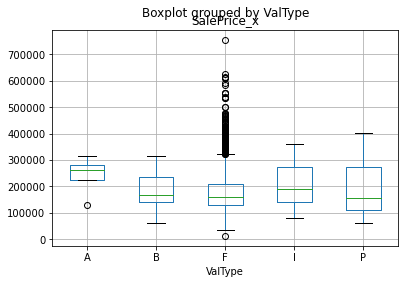

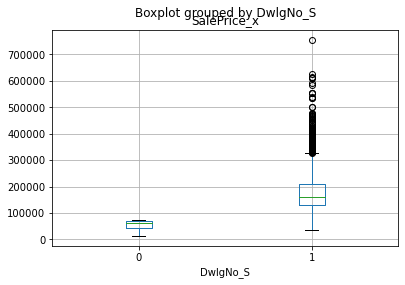

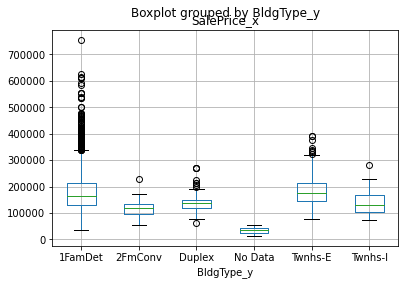

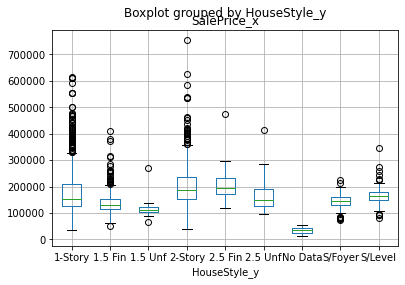

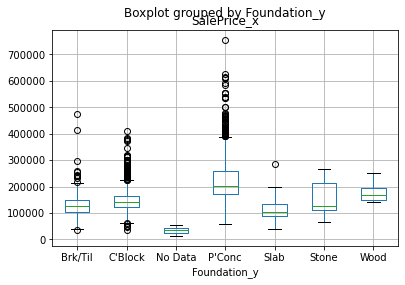

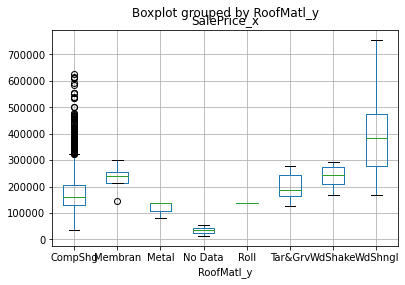

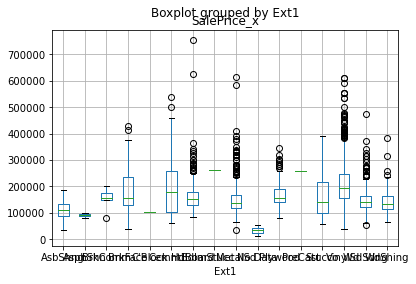

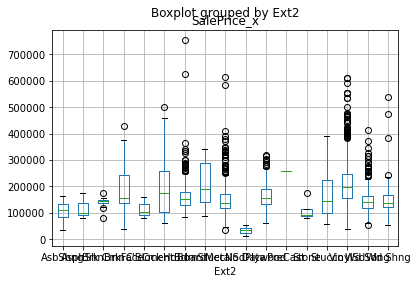

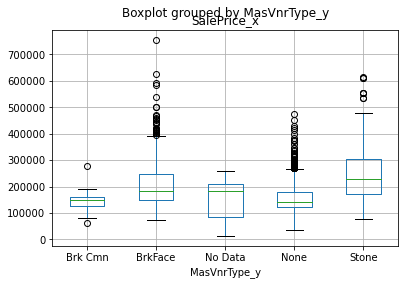

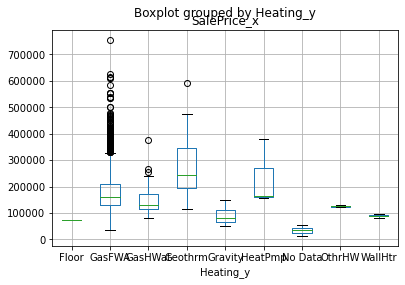

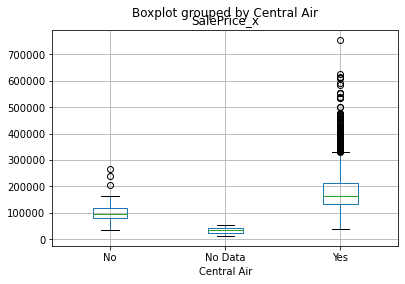

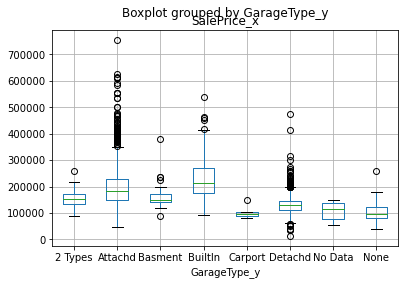

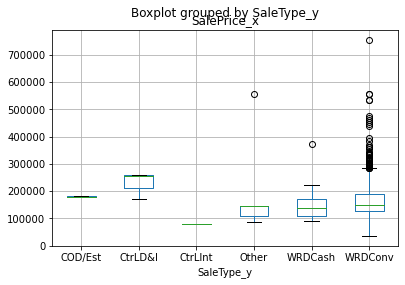

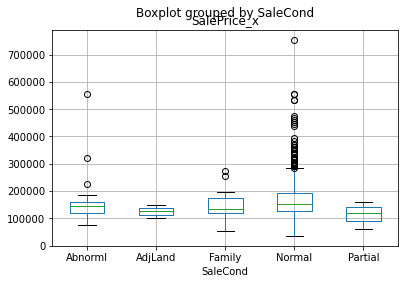

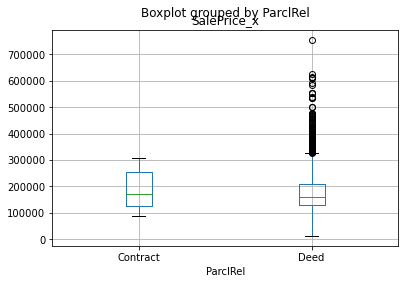

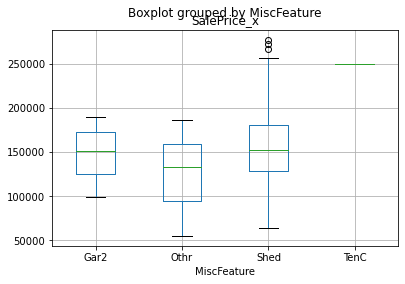

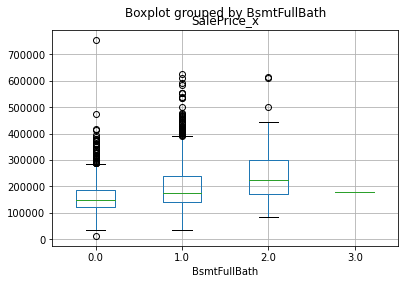

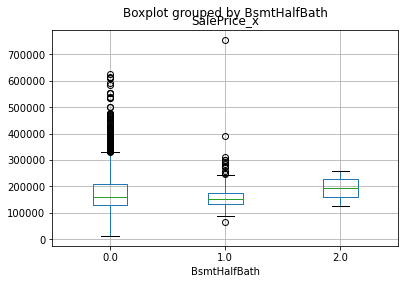

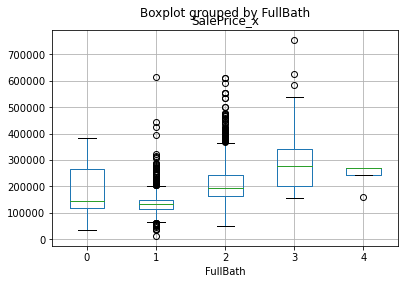

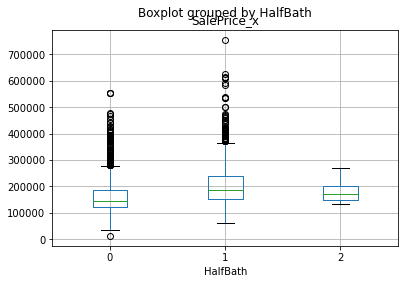

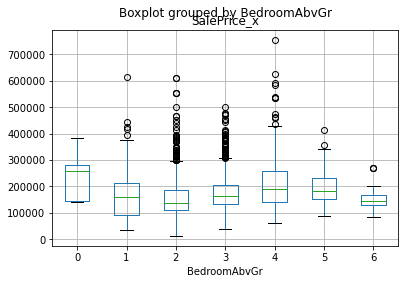

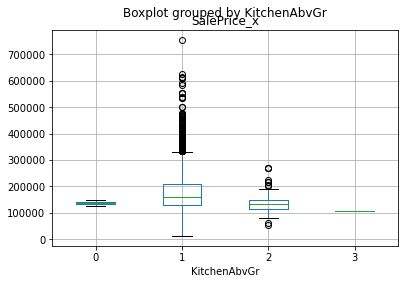

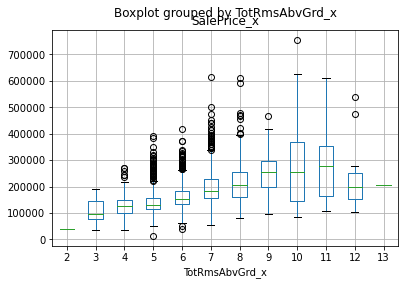

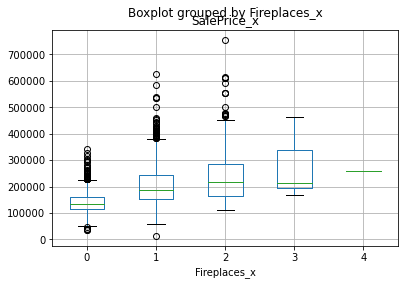

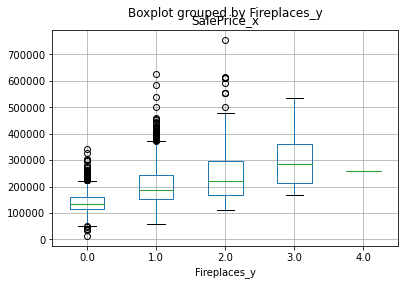

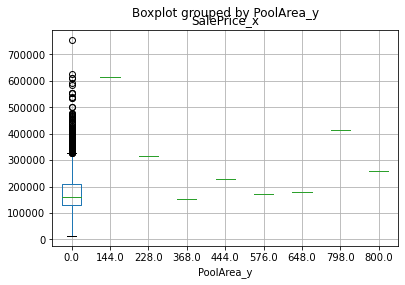

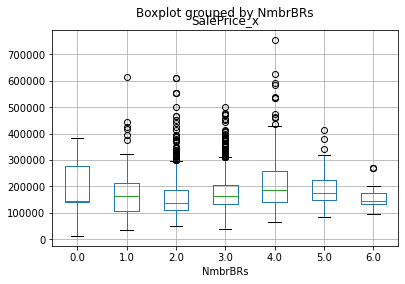

In [82]:
for col in categ + nonlin:
    both.boxplot(column='SalePrice_x', by=col)

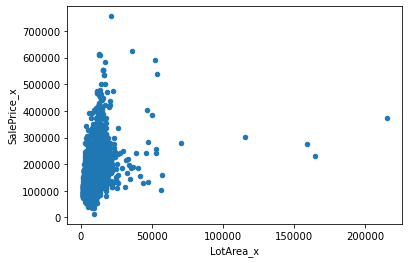

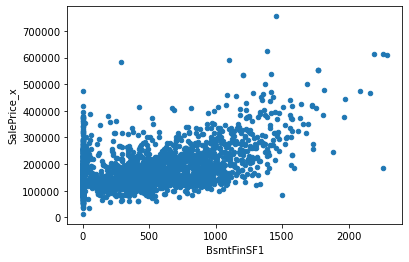

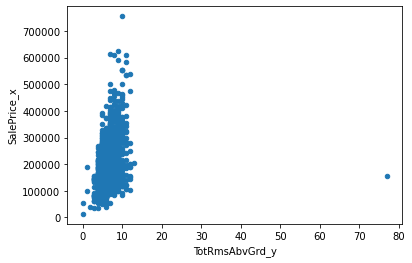

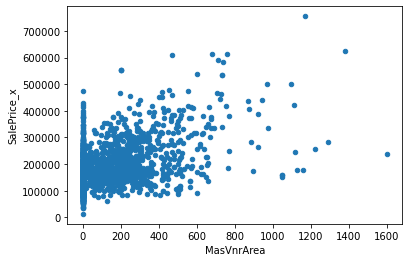

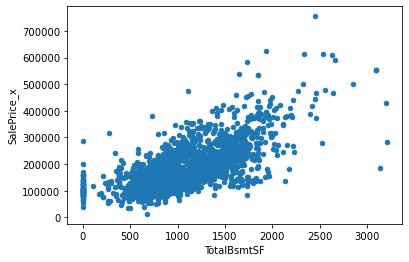

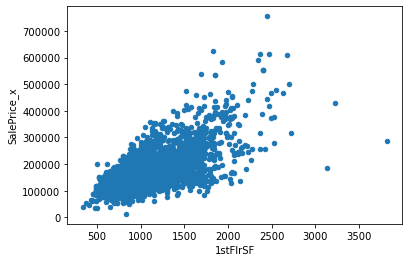

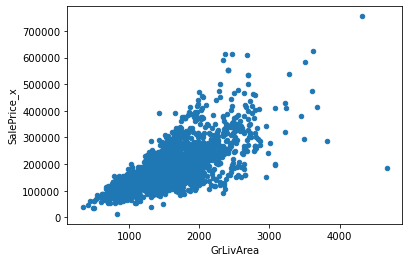

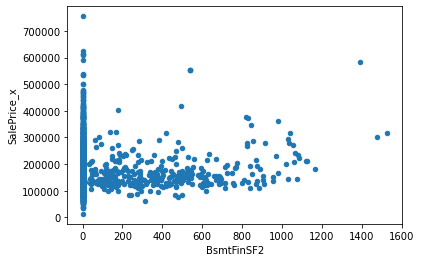

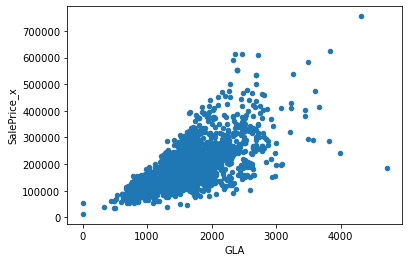

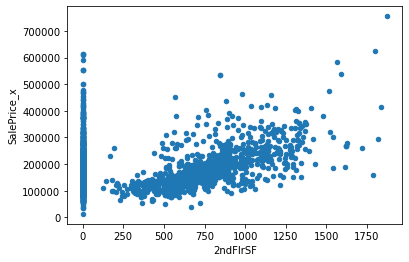

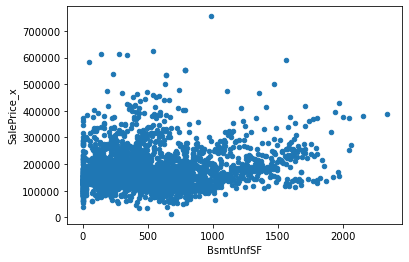

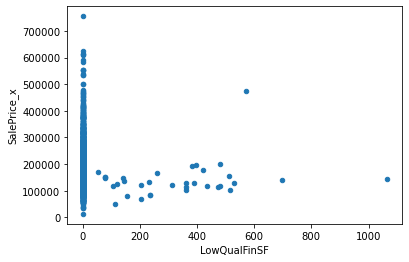

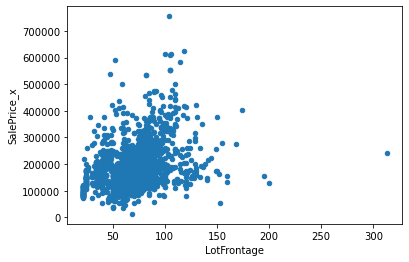

In [83]:
for col_nm in lin:
    both.plot.scatter(x=col_nm,y='SalePrice_x')

In [84]:
choices = ['chi2', 'f_test', 'mutual_info']

In [85]:
# categ
# ordinal
# nonlin
# lin
# choice=choices[0]
# if choice == 'chi2':
#     selector = chi2
#     data = both[categ].astype(int)
# elif choice == 'f_test':
#     selector = f_classif
#     data = both[lin]
# elif choice == 'mutual_info':
#     selector = mutual_info_classif
#     data = both[ordinal + nonlin]



In [87]:
# df['DataFrame Column'] = df['DataFrame Column'].replace(np.nan, 0)

In [100]:
to_zer = pd.DataFrame(nulls_df[(nulls_df.Nulls<220) & (nulls_df.Nulls>0)]) ##this turned out to be just as many as <100
null_to_0=[]
ttl_indep = list(X.columns)
for cl_nm in to_zer.Col_Nm:
    null_to_0.append(cl_nm)
null_to_0

['MasVnrType_x',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Electrical',
 'BsmtFullBath',
 'BsmtHalfBath',
 'GarageType_x',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea_x',
 'GarageQual',
 'GarageCond',
 'MA_Line1',
 'MA_City',
 'MA_State',
 'MA_Zip1',
 'Neighborhood_y',
 'LotArea_y',
 'ParType',
 'BldgType_y',
 'YrBuilt',
 'HouseStyle_y',
 'Foundation_y',
 'RoofMatl_y',
 'Ext1',
 'Ext2',
 'MasVnrType_y',
 'Heating_y',
 'Central Air',
 'GLA',
 'TtlBsmtSF',
 'TotRmsAbvGrd_y',
 'Fireplaces_y',
 'PoolArea_y',
 'GarageType_y',
 'GarYrBlt',
 'Cars',
 'GarageArea_y',
 'PA-StSfx',
 'NmbrBRs']

In [115]:
set_A = set(null_to_0)
set_B = set(ttl_indep)
to_0 = list(set_B.intersection(set_A))
X[to_0]

,BsmtFinSF1,Ext2,MasVnrType_y,MasVnrArea,Ext1,GarageFinish,MA_City,GarageType_x,MasVnrType_x,NmbrBRs,...,BldgType_y,MA_Zip1,TotRmsAbvGrd_y,BsmtQual,BsmtHalfBath,GarageType_y,GarageCond,BsmtFinType2,Foundation_y,Heating_y
0,238.0,Wd Sdng,None,0.0,Wd Sdng,Unf,AMES,Detchd,None,2.0,...,1FamDet,50010.0,4.0,TA,0.0,Detachd,TA,Unf,C'Block,GasFWA
1,552.0,HdBoard,BrkFace,149.0,HdBoard,Fin,AMES,Attchd,BrkFace,2.0,...,Twnhs-E,50014.0,5.0,Gd,0.0,Attachd,TA,ALQ,C'Block,GasFWA
2,552.0,HdBoard,BrkFace,149.0,HdBoard,Fin,AMES,Attchd,BrkFace,2.0,...,Twnhs-E,50014.0,5.0,Gd,0.0,Attachd,TA,ALQ,C'Block,GasFWA
3,737.0,MetalSd,None,0.0,MetalSd,Unf,AMES,Detchd,None,2.0,...,1FamDet,50010.0,5.0,TA,0.0,Detachd,Po,Unf,Brk/Til,GasFWA
4,0.0,MetalSd,None,0.0,MetalSd,Unf,AMES,Detchd,None,2.0,...,1FamDet,50010.0,6.0,Fa,0.0,Detachd,TA,Unf,Brk/Til,GasFWA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,0.0,Wd Sdng,None,0.0,Wd Sdng,Unf,AMES,Detchd,None,2.0,...,1FamDet,50010.0,4.0,TA,0.0,Detachd,Po,Unf,Brk/Til,Gravity
2599,0.0,Wd Sdng,None,0.0,BrkFace,Unf,AMES,Attchd,None,4.0,...,1FamDet,50014.0,8.0,0,0.0,Attachd,TA,0,Slab,GasFWA
2600,284.0,MetalSd,None,0.0,MetalSd,Unf,STATE COLLEGE,2Types,None,4.0,...,Duplex,16801.0,8.0,TA,0.0,No Data,TA,Unf,C'Block,GasFWA
2601,841.0,VinylSd,BrkFace,144.0,VinylSd,Fin,AMES,Attchd,BrkFace,3.0,...,1FamDet,50014.0,7.0,Gd,0.0,Attachd,TA,Unf,P'Conc,GasFWA


In [116]:
X[to_0].isnull().any().sum()
for col in to_0:
    X[col] = X[col].replace(np.nan,0)

<ipython-input-116-e52218de18a8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = X[col].replace(np.nan,0)


In [128]:
X.Alley = X.Alley.replace(np.nan,0)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [129]:
X['Alley'].isnull().sum()

0

In [140]:
X.isnull().sum().sort_values(ascending=False).head(9)

PoolQC         2594
MiscFeature    2505
ZngOLPr        2462
Fence          2075
SaleCond       1936
SaleType_y     1936
FireplaceQu    1261
MA_Zip2         686
LotFrontage     462
dtype: int64

In [143]:
to_dr = ['PoolQC','MiscFeature','ZngOLPr','Fence','SaleCond','SaleType_y','FireplaceQu','MA_Zip2']
addl_to_0 = ['LotFrontage']

In [148]:
X = X.drop(columns = ['PoolQC','MiscFeature','ZngOLPr','Fence','SaleCond','SaleType_y','FireplaceQu','MA_Zip2'],axis=1)

In [150]:
X['LotFrontage'] = X['LotFrontage'].replace(np.nan,0)

In [152]:
X.isnull().any().sum()

0

In [154]:
indeps = list(X.columns)

In [182]:
categ = ['MSSubClass','MSZoning','Street','Alley','LotShape','LandContour','LotConfig','LandSlope','Neighborhood_x',\
         'Condition1','Condition2','BldgType_x', 'HouseStyle_x','RoofStyle','RoofMatl_x','Exterior1st','Exterior2nd','MasVnrType_x','ExterQual',\
         'ExterCond','Foundation_x','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating_x','HeatingQC','CentralAir','GarageType_x','GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC',\
         'Electrical','KitchenQual','Functional','FireplaceQu','ZngCdPr','ZngOLPr','Fence','ClassPr_S','ClassSc_S','SchD_S','TxD_S',\
         'MA_City','MA_State','MA_Zip1','MA_Zip2','Inst1TPr','ValType','DwlgNo_S','BldgType_y','HouseStyle_y','Foundation_y','RoofMatl_y','Ext1','Ext2','MasVnrType_y','Heating_y','Central Air',\
        'GarageType_y','SaleType_y','SaleCond','ParclRel','MiscFeature']
ordinal = ['SaleType_x','SaleCondition']
nonlin = ['BsmtFullBath', 'BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd_x','Fireplaces_x','Fireplaces_y','GarageCars','NmbrBRs','OverallQual' ,'OverallCond']
lin =['LotArea_x','BsmtFinSF1','TotRmsAbvGrd_y','MasVnrArea','TotalBsmtSF','1stFlrSF','GrLivArea','BsmtFinSF2','GLA','2ndFlrSF','BsmtUnfSF','LowQualFinSF','LotFrontage','GarageArea_x','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea_x','MiscVal','PoolArea_y']
date_tm = ['YearBuilt', 'YearRemodAdd','GarageYrBlt']
#'OverallQual','OverallCond' 
clean_categ = []
clean_ordinal=[]
clean_nonlin = []
clean_lin = []
clean_date_tm = []

for colnm in indeps:
    if colnm in categ:
        clean_categ.append(colnm)
for colnm in indeps:
    if colnm in ordinal:
        clean_ordinal.append(colnm)
for colnm in indeps:
    if colnm in nonlin:
        clean_nonlin.append(colnm)
for colnm in indeps:
    if colnm in lin:
        clean_lin.append(colnm)
for colnm in indeps:
    if colnm in date_tm:
        clean_date_tm.append(colnm)


In [183]:
print(len(categ))
print(len(clean_categ))
print(len(ordinal))
print(len(clean_ordinal))
print(len(nonlin))
print(len(clean_nonlin))
print(len(lin))
print(len(clean_lin))
print(len(date_tm))
print(len(clean_date_tm))

X = X[clean_categ+clean_ordinal+clean_nonlin+clean_lin+clean_date_tm]

67
59
2
2
13
13
22
22
3
3


/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/tools.py:185: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


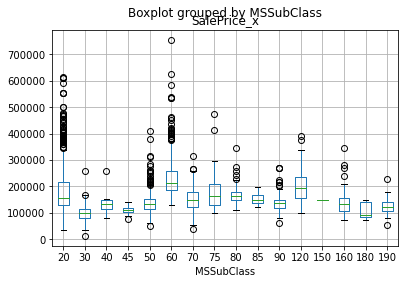

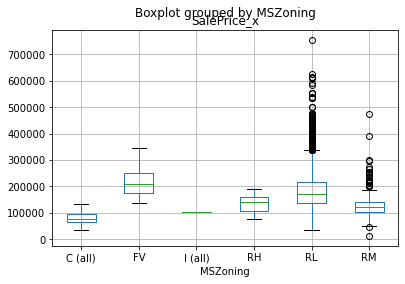

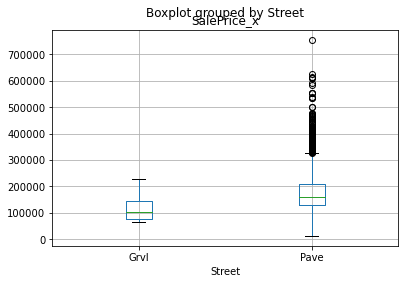

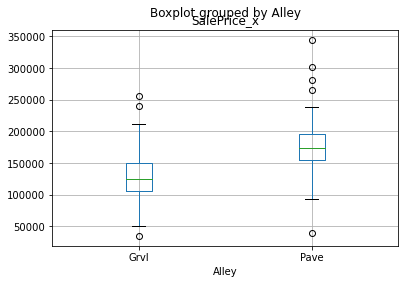

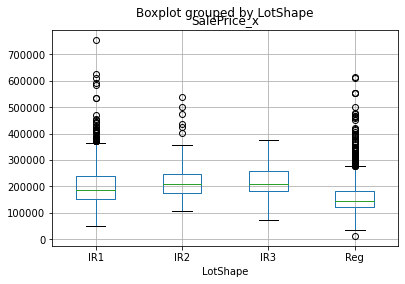

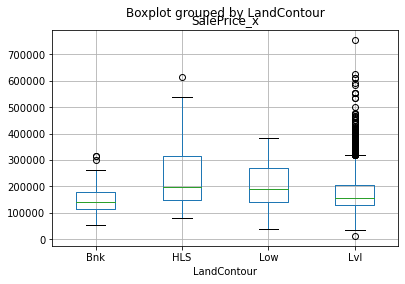

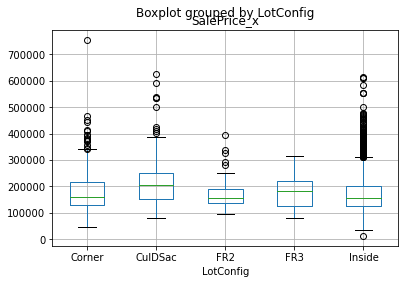

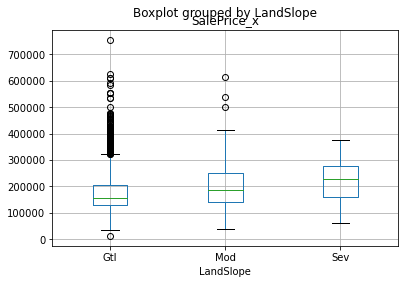

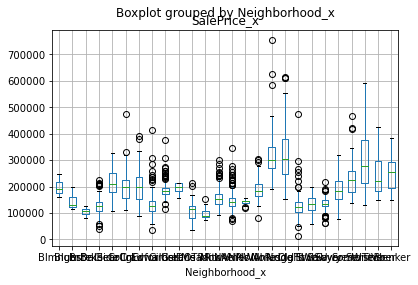

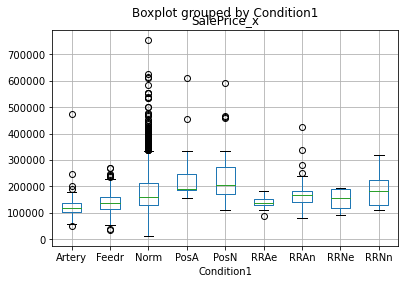

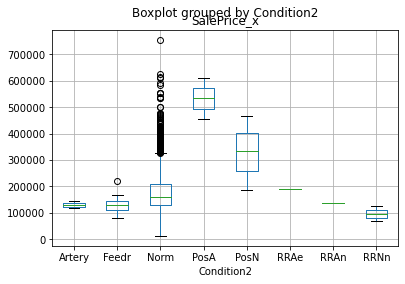

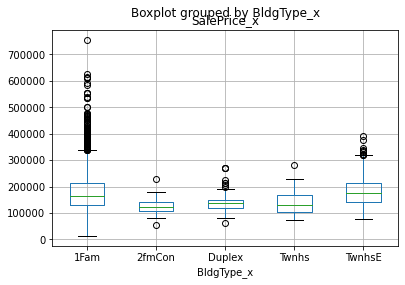

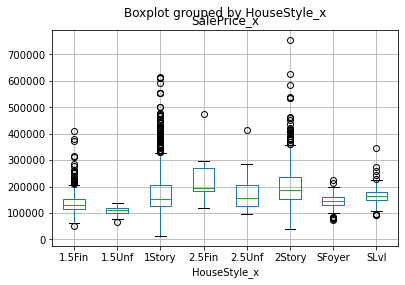

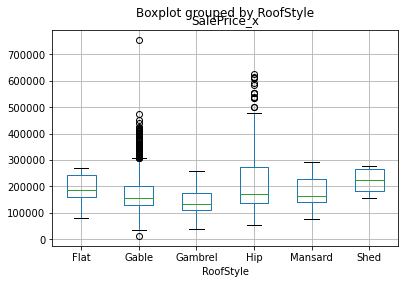

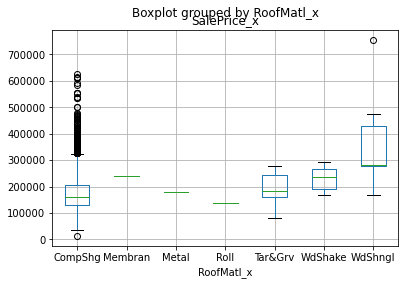

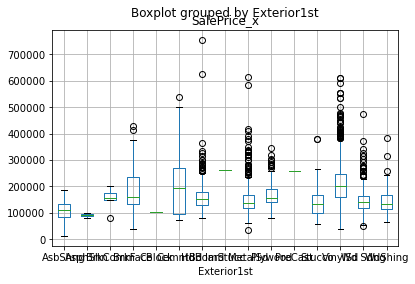

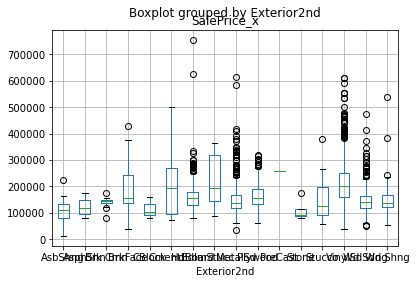

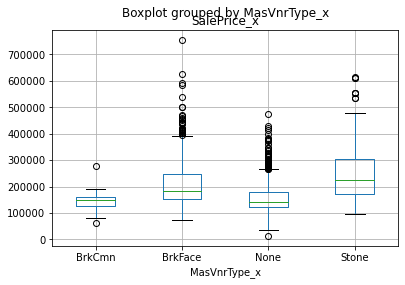

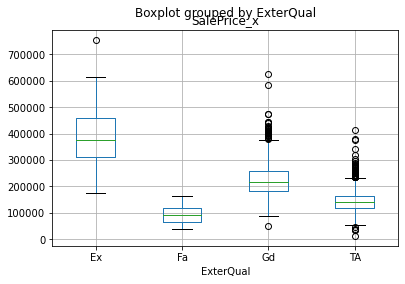

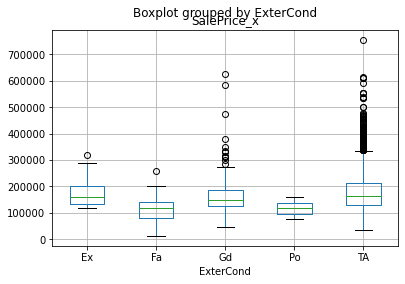

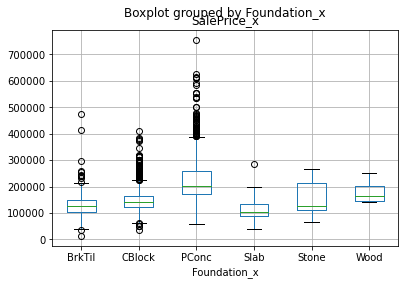

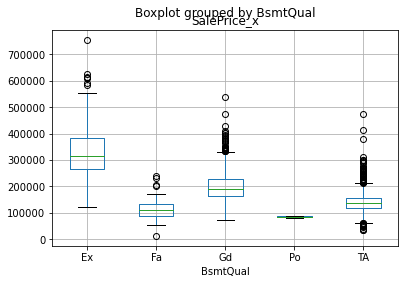

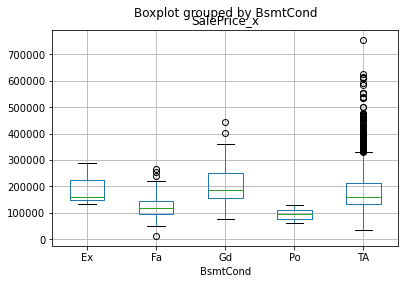

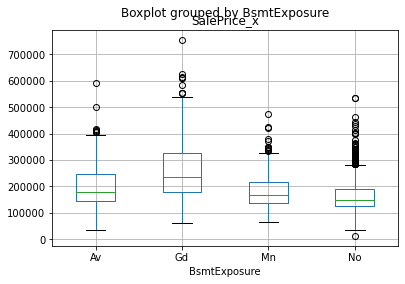

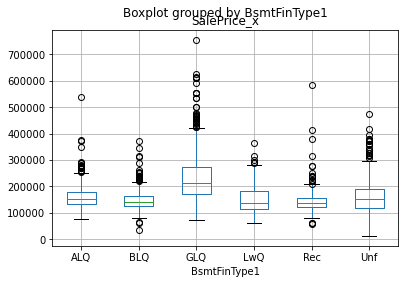

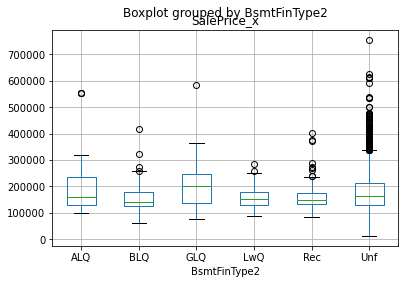

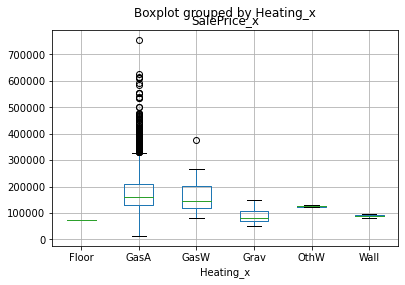

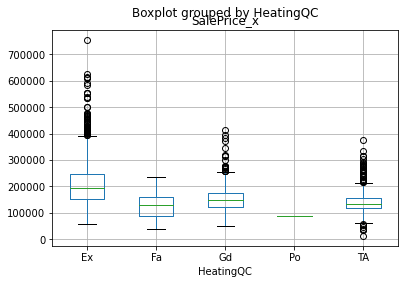

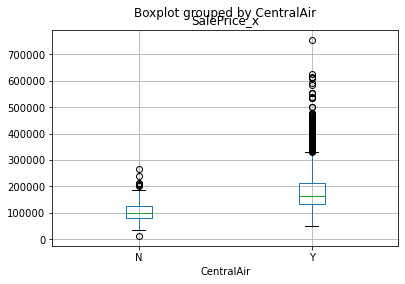

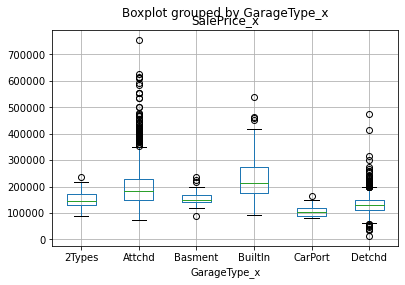

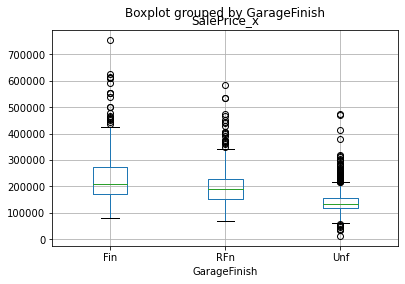

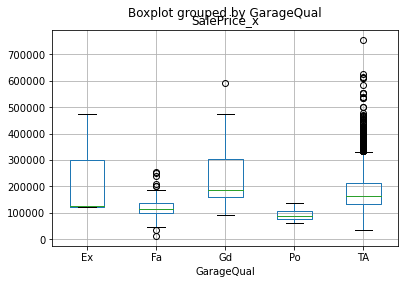

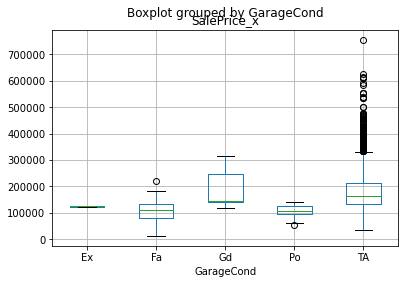

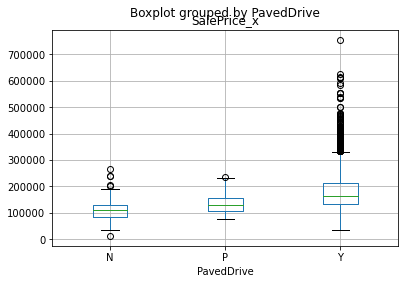

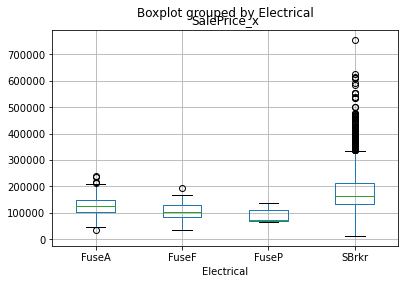

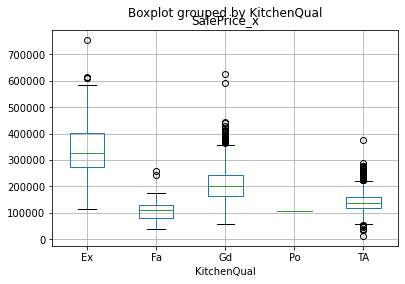

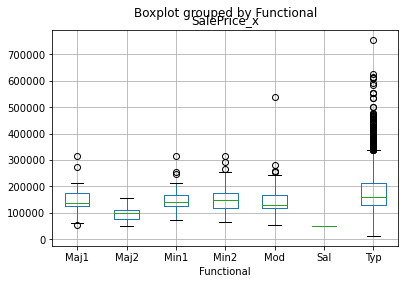

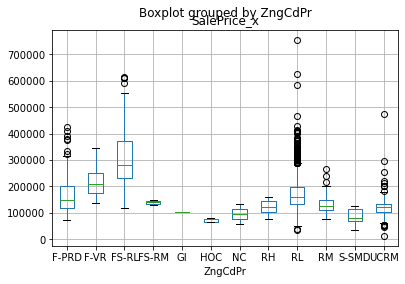

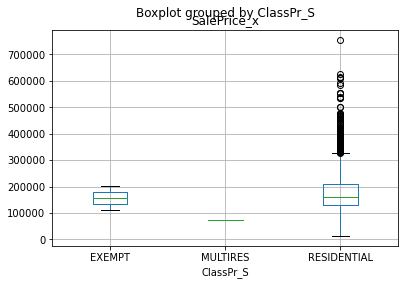

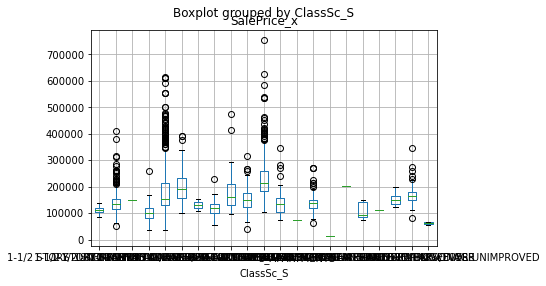

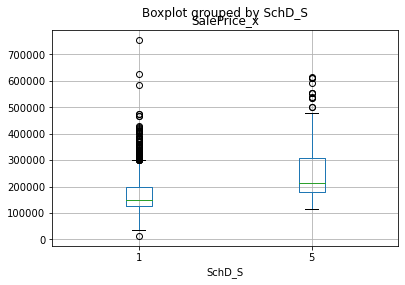

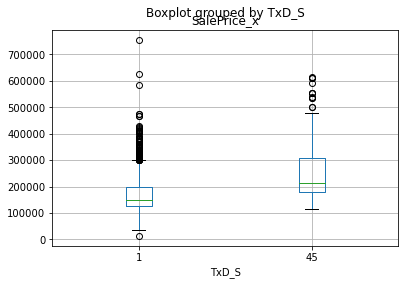

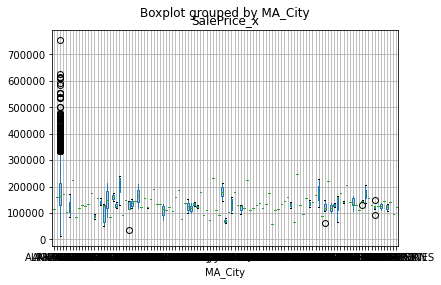

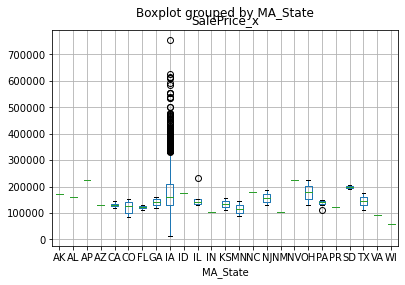

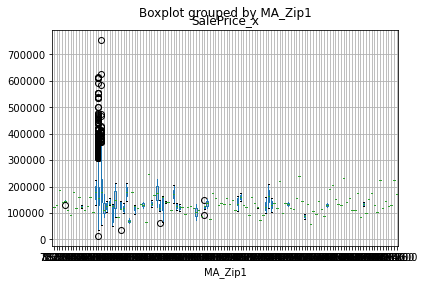

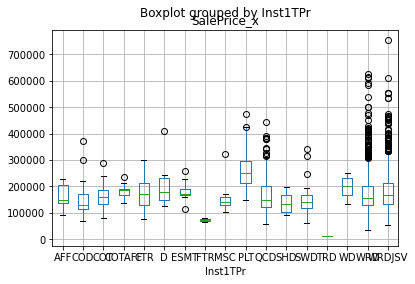

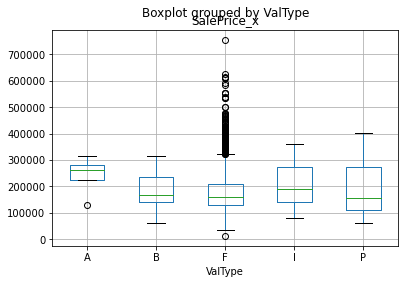

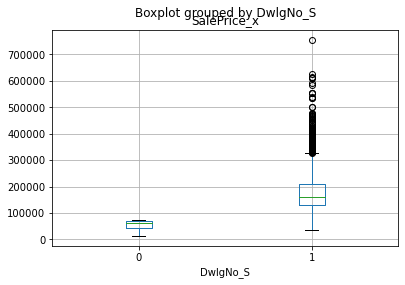

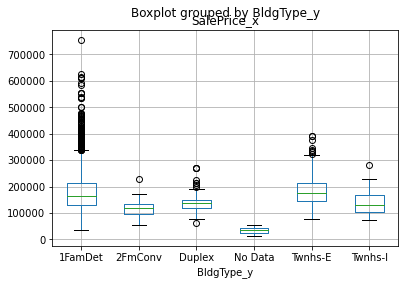

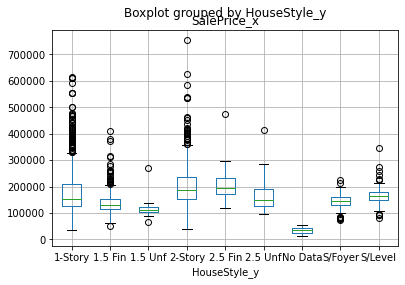

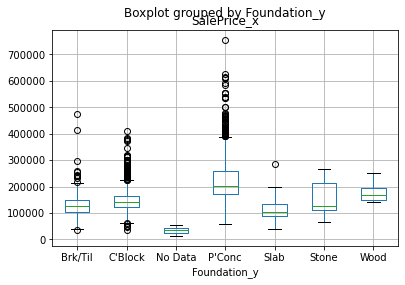

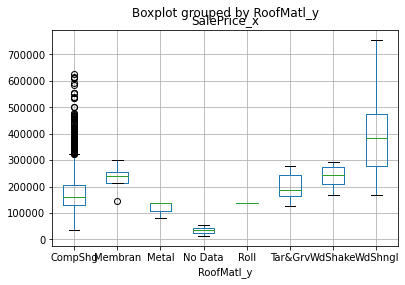

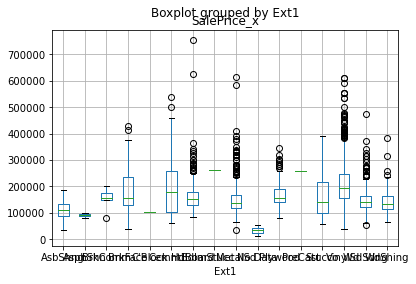

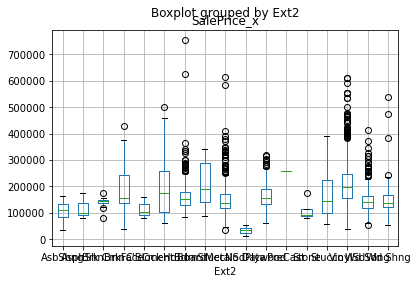

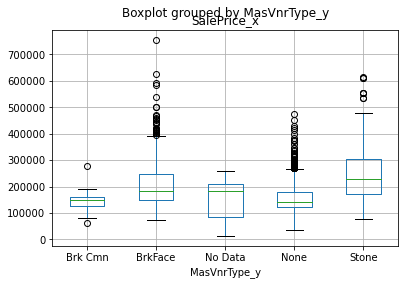

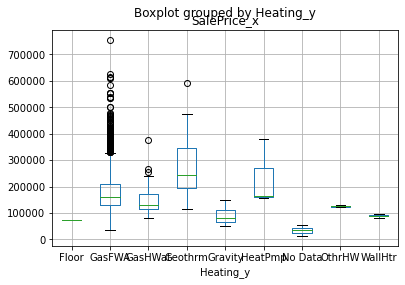

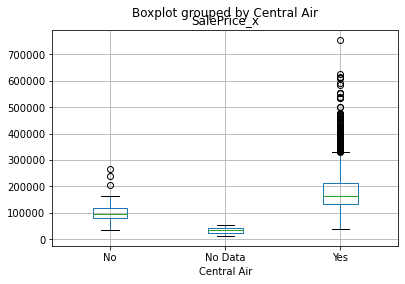

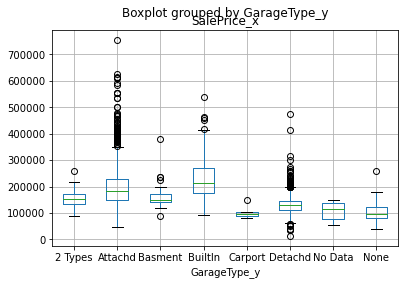

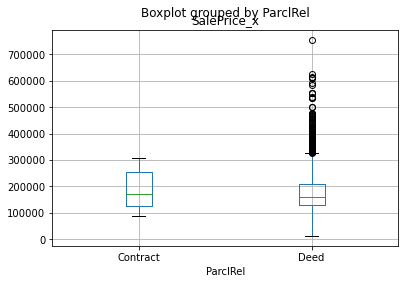

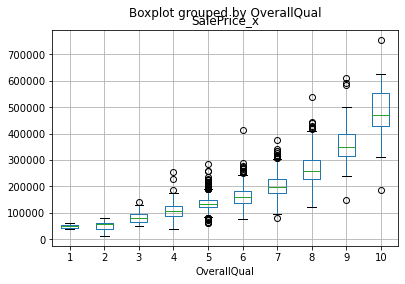

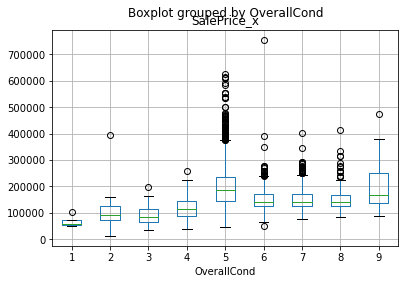

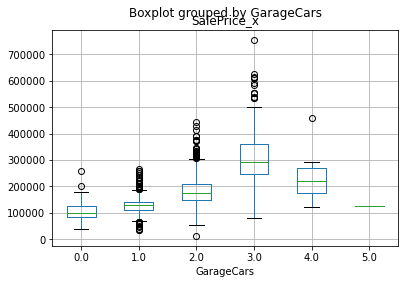

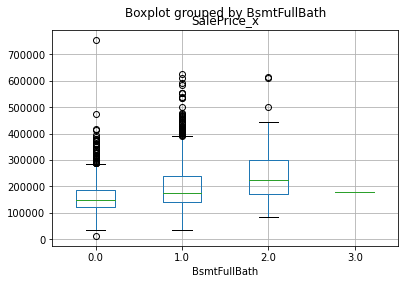

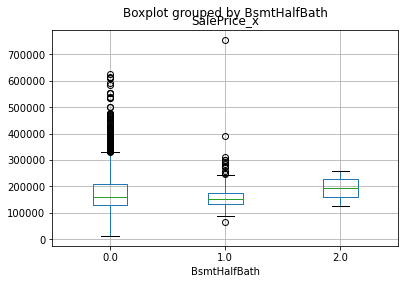

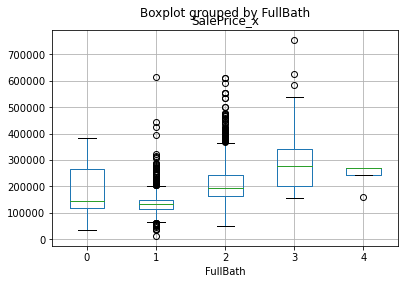

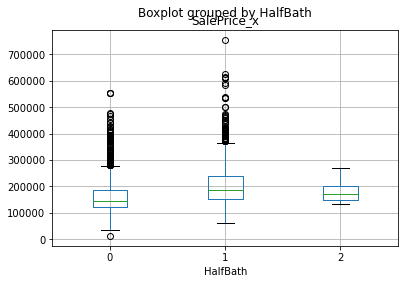

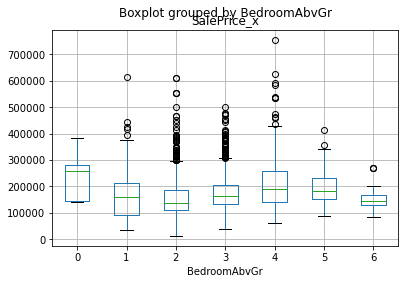

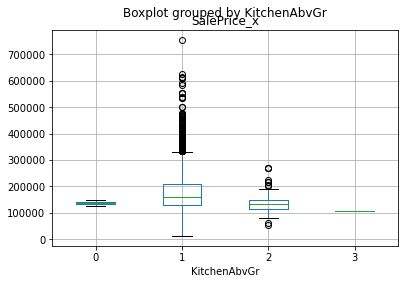

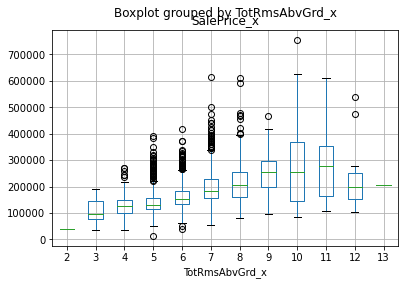

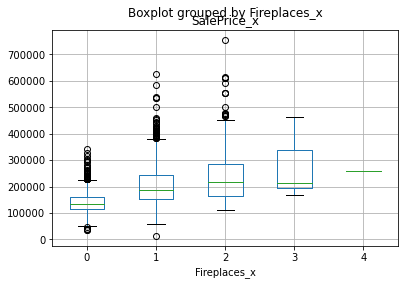

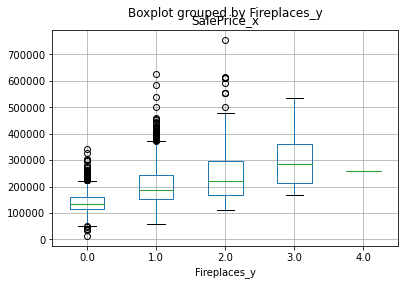

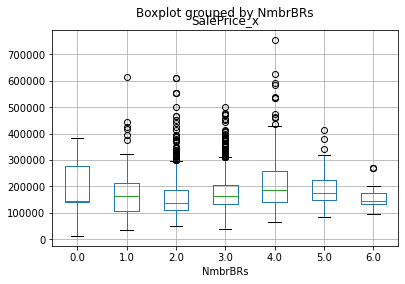

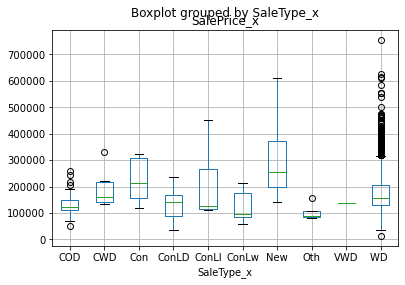

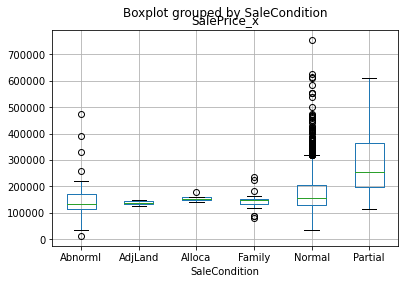

In [184]:
# add to lin : GarageArea_x , WoodDeckSF , OpenPorchSF , EnclosedPorch , 3SsnPorch , Screen Porch , PoolArea_x , MiscVal , 
for col in clean_categ + clean_nonlin + clean_ordinal:
    both.boxplot(column='SalePrice_x', by=col)

/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


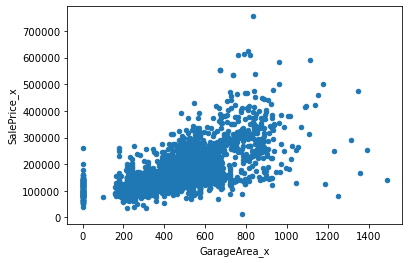

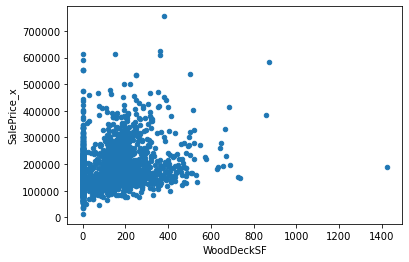

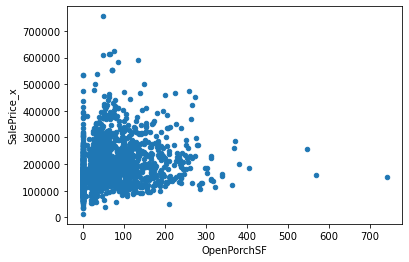

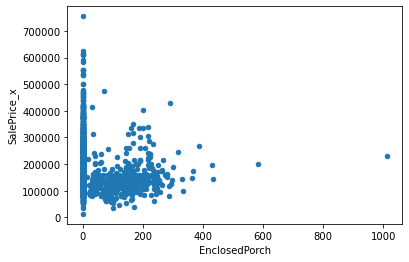

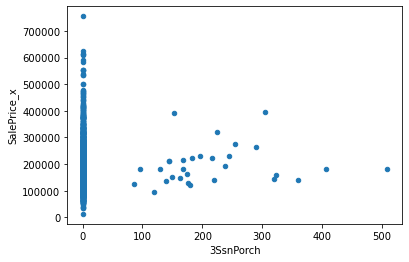

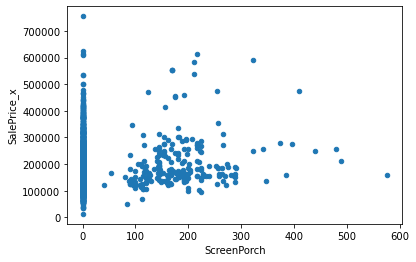

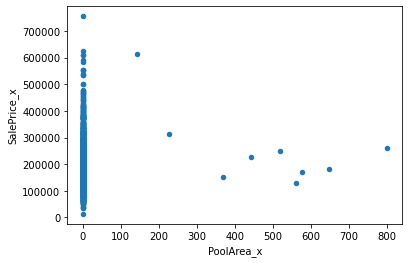

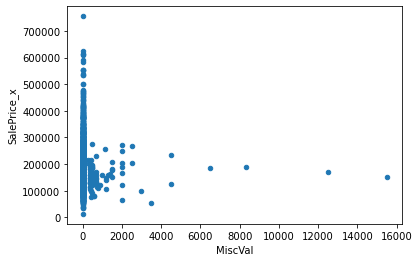

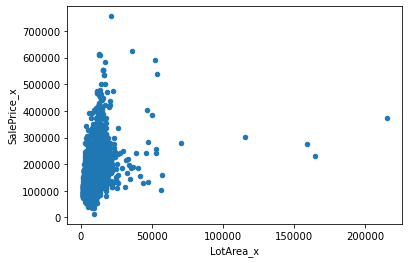

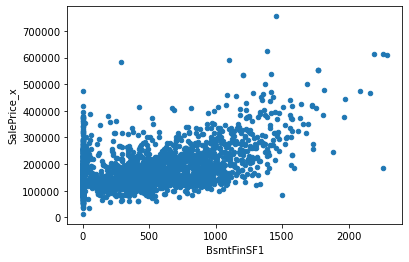

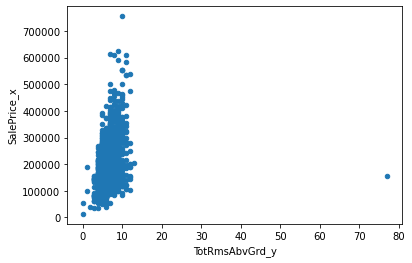

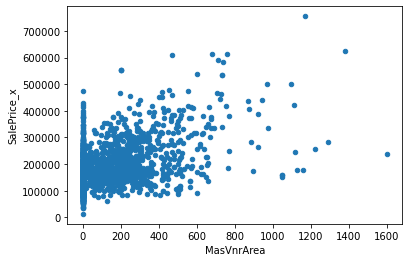

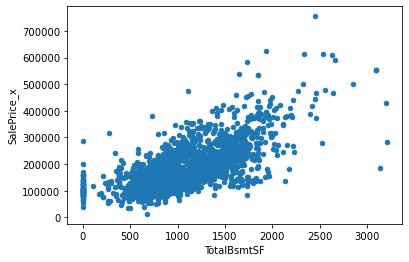

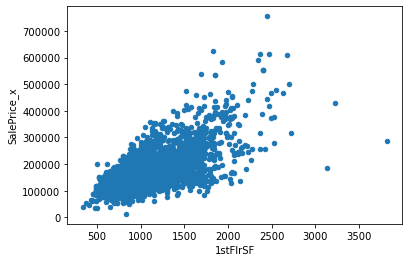

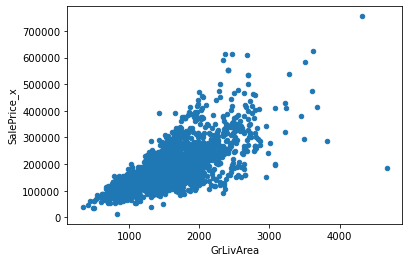

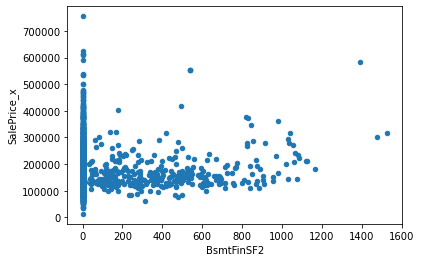

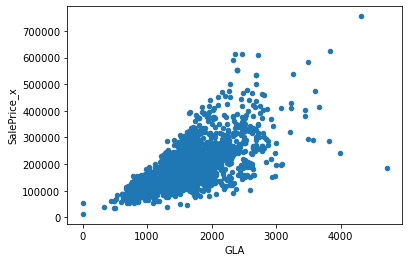

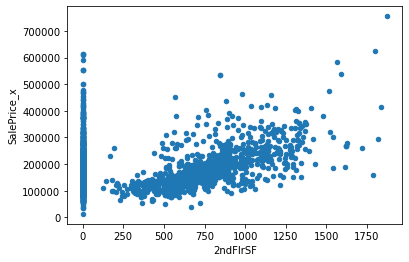

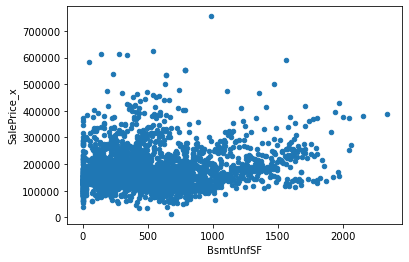

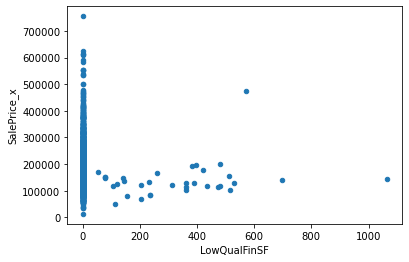

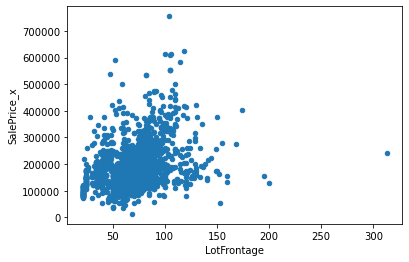

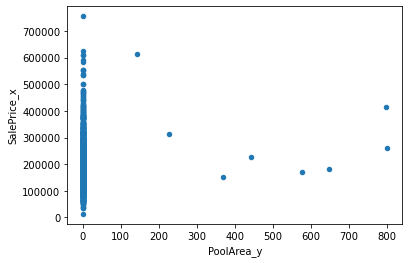

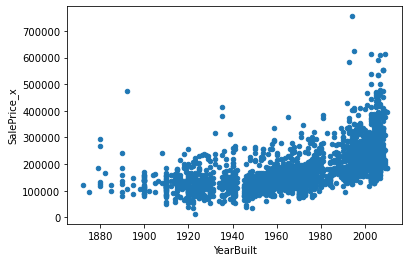

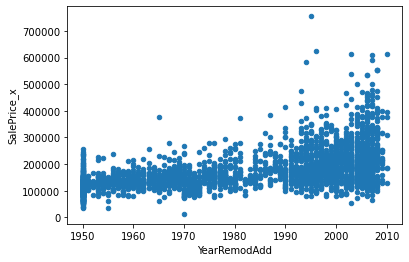

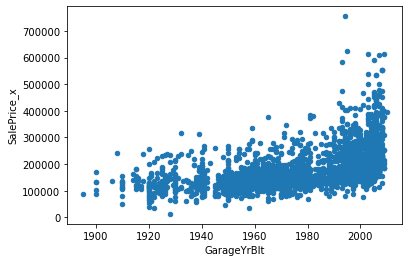

In [185]:
for col_nm in clean_lin + clean_date_tm:
    both.plot.scatter(x=col_nm,y='SalePrice_x')